# Quiz

In [1]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

## Question 1

**Name:** Ali Furkan Kalay

**ID:**45625365

**IN-CLASS EXERCISE**

At each point $x$ in $x_{grid}$, we can evaluate an error of interpolation by calculating the difference between the true function and the interpolant at $x$. (You don't need to calculate the absolute error.)

Compute and plot the error for the nearest-neighbor, linear, (natural) cubic spline, and the Lagrange interpolations.

In [2]:
testf = lambda x: 0.1*x**4-0.5*x**3-2*x**2-2*x -1
testf_der = lambda x: 0.4*x**3 - 1.5*x**2 - 4*x-2

testfv = np.vectorize(testf)
testf_derv = np.vectorize(testf_der)

xlb = -5.0
xub = 3.0 

x_grid = np.arange(xlb, xub, step = 0.01) # vector x = [-5,...,3], and f(x) = [f1,..., fn]
fx_grid = testfv(x_grid)

step_data = (xub-xlb)/10
x_data = np.array([xlb+i*step_data for i in range(11)]) # i from 0 to 10, 11个数
fx_data = testfv(x_data)

In [3]:
int_Nearest = interpolate.interp1d(x_data,fx_data,kind='nearest')
fx_Nearest = int_Nearest(x_grid)

In [4]:
def lininterp(x,y):
    def interpolant(z):
        i = int( (z-x[0]) // (x[1]-x[0]) )
        if i<len(x)-1:
            r = y[i] + (z-x[i])*(y[i+1]-y[i])/(x[i+1]-x[i])
        else:
            r = y[-1]
        return r
    return np.vectorize(interpolant)

int_Linear = lininterp(x_data,fx_data)
fx_Linear = int_Linear(x_grid)

In [5]:
int_Ncubic = interpolate.CubicSpline(x_data,fx_data,bc_type='clamped')
fx_Ncubic = int_Ncubic(x_grid)

In [6]:
def laginterp(x,y):
    
    x0, y0 = x[:],y[:]
    
    n = len(x)
    np.reshape(x0, (n,1))
    np.reshape(y0, (n,1))
    
    Vmat = np.ones((n,n))
    for i in range(1,n):
        Vmat[:,i] = x0**i
        
    a = np.linalg.solve(Vmat,y0)
        
    return np.poly1d(a[::-1])
int_Lag = laginterp(x_data,fx_data)
fx_Lag = int_Lag(x_grid)

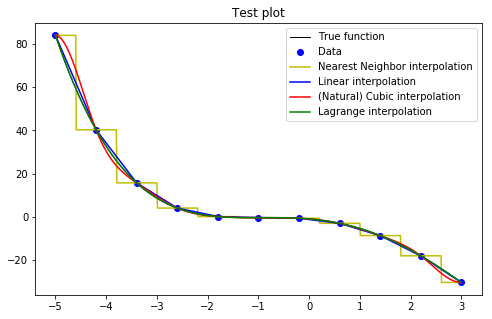

In [7]:
fig, ax = plt.subplots(figsize = (8,5))

line1, = ax.plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax.plot(x_data, fx_data, 'bo', linewidth=1, label='Data')
line3, = ax.plot(x_grid, fx_Nearest, 'y-', label='Nearest Neighbor interpolation')
line4, = ax.plot(x_grid, fx_Linear, 'b-', label='Linear interpolation')
line5, = ax.plot(x_grid, fx_Ncubic, 'r-', label='(Natural) Cubic interpolation')
line6, = ax.plot(x_grid, fx_Lag, 'g-', label='Lagrange interpolation')
ax.legend(loc='upper right')
ax.set_title('Test plot')

plt.show()

Calculating errors:

In [8]:
fx_Nearest_error = fx_grid - fx_Nearest
fx_Linear_error = fx_grid - fx_Linear
fx_Ncubic_error = fx_grid - fx_Ncubic
fx_Lag_error = fx_grid - fx_Lag

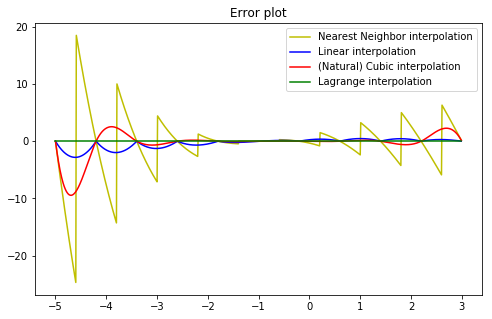

In [9]:
fig, ax = plt.subplots(figsize = (8,5))
line3, = ax.plot(x_grid, fx_Nearest_error, 'y-', label='Nearest Neighbor interpolation')
line4, = ax.plot(x_grid, fx_Linear_error, 'b-', label='Linear interpolation')
line5, = ax.plot(x_grid, fx_Ncubic_error, 'r-', label='(Natural) Cubic interpolation')
line6, = ax.plot(x_grid, fx_Lag_error, 'g-', label='Lagrange interpolation')
ax.legend(loc='upper right')
ax.set_title('Error plot')

plt.show()

## QUESTION 2

**Name:** Yi Zhang

**ID:** 44048510

Check whether the Runge phenomenon still occur if we use piecewise Hermite polynomial interpolation by either setting equidisant nodes or Chebyshev nodes.

Let's continue to consider instead

$$f(x) = 1/(1+x^2)$$

over $[-5,5]$.

**1.Piecewise Hermite polynomial interpolation:**

*Definition*:

Let $a$ = $x_0$ < $x_1$ < ... < $x_n$ = $b$ be the nodes on the an interval [a, b]. Given the value of $f(x)$ on these nodes and first order derivative be $f_0$,$f_1$,...,$f_n$ and $f'_0$,$f'_1$,...,$f'_n$, respectively, there exsits a piecewise function $I_h(x)$ satisifying :

(1) $I_h(x)$ is $C^1$ on interval [a,b];


(2) $I_h(x_k)$ = $f_k$, and $I'_{h}(x_k)$ = $f'_k$,   $k  =0 ,1 ,2, ..., n$;


(3) $I_h(x_k)$ is a cubic polynomial on each subinterval [$x_k$, $x_{k+1}$]


Then, $I_h(x)$ is called a **piecewise cubic Hermite interpolation polynomial** for $f(x)$ on [a, b]


Precisely, $I_h(x)$ on [$x_k$, $x_{k+1}$] can be written as:

\begin{eqnarray*}
 I_h(x) = \left(1+ 2\frac{x-x_k}{x_{k+1}-x_k}\right)\left(\frac{x-x_{k+1}}{x_k-x_{k+1}}\right)^2 f_k \\
 +\left(1+ 2\frac{x-x_{k+1}}{x_{k}-x_{k+1}}\right)\left(\frac{x-x_{k}}{x_{k+1}-x_{k}}\right)^2 f_{k+1} \\
+ (x - x_k)\left(\frac{x-x_{k+1}}{x_{k}-x_{k+1}}\right)^2 f'_k + (x - x_{k+1})\left(\frac{x-x_{k}}{x_{k+1}-x_{k}}\right)^2 f'_{k+1}
\end{eqnarray*}

where $x$ belongs to  [$x_k$, $x_{k+1}$]

**Merits:** There is a therom proving that $I_h(x)$ converges to $fx)$ by showing the abosute deviation of $I_h(x)$ from $fx)$ is smaller than a very small postive number, x belongs [a, b].

**Drawbacks:** we need the information of derivatives of the original function, and also $I_h(x)$ is $C^1$ on interval [a,b], which cannot ensure the smoothness.

**2. Runge Phenomenon**


This is a problem of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials of high degree over a set of equispaced interpolation points.


We can show that using piecewise cubic Hermite interpolation polynomial over either equidistant points  or Chebyshev points will not  trigger  Runge Phenomenon.


But I expect piecewise high order (larger than 3) Hermite polynomial would trigger Runge Phenomenon, though I am not able to find the corresponding package or alogrithm for now.


I can show this if we using spline method with a higher order polynomial.


URL:
scipy.interpolate.PchipInterpolator
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html

PCHIP : Piecewise Cubic Hermite Interpolation Polynomial

Defining function and Lagrange Data:

In [10]:
testf = lambda x: 1.0/(1.0+x**2)

testf_der = lambda x: -(2*x)/((1.0+x**2)**2)
testfv = np.vectorize(testf)
testf_derv = np.vectorize(testf_der)

xlb = -5.0
xub = 5.0

x_grid = np.arange(xlb, xub, step = 0.01) 
fx_grid = testfv(x_grid)

Defining the equidistant nodes

In [11]:
i = 10
step_data = (xub-xlb)/i
x_data = np.array([xlb+i*step_data for i in range(i+1)])
fx_data = testfv(x_data)

Defining Chebvshev nodes

In [12]:
x_data_new = np.empty_like(x_data)

n = len(x_data_new)

for i in range(n):
    x_data_new[i] = xlb + (xub-xlb)/2*(np.cos((2*(i+1)-1)*np.pi/(2*n))+1.0)
 
 # 
x_data_new = x_data_new [::-1]
fx_data_new = testfv(x_data_new)

Interpolation:

In [13]:
# Piecewise Hermite polynomial interpolation

int_Hcubic = interpolate.PchipInterpolator(x_data,fx_data) # PCHIP : Piecewise Cubic Hermite Interpolation Polynomial
fx_Hcubic = int_Hcubic(x_grid)


int_Hcubic_new = interpolate.PchipInterpolator(x_data_new,fx_data_new)
fx_Hcubic_new = int_Hcubic_new(x_grid)

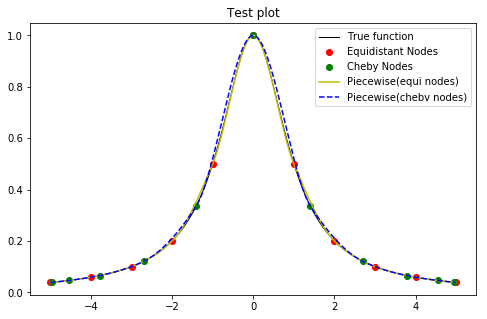

In [14]:
fig5, ax5 = plt.subplots(figsize = (8,5))

line1, = ax5.plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax5.plot(x_data, fx_data, 'ro', linewidth=1, label='Equidistant Nodes')
line3, = ax5.plot(x_data_new, fx_data_new, 'go',linewidth=1, label='Cheby Nodes')
line4, = ax5.plot(x_grid, fx_Hcubic, 'y-', label= 'Piecewise(equi nodes)')
line5, = ax5.plot(x_grid, fx_Hcubic_new, 'b--', label='Piecewise(chebv nodes)')
ax5.legend(loc='upper right')
ax5.set_title('Test plot')

plt.show()

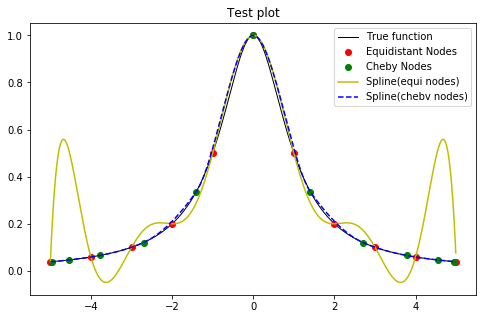

In [15]:
# Spline Methods

order = 7

int_Spline = interpolate.interp1d(x_data,fx_data,kind=order) 
fx_Spline = int_Spline(x_grid)

int_Spline_new = interpolate.interp1d(x_data_new,fx_data_new,kind=order)
fx_Spline_new = int_Hcubic_new(x_grid)


fig5, ax5 = plt.subplots(figsize = (8,5))

line1, = ax5.plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax5.plot(x_data, fx_data, 'ro', linewidth=1, label='Equidistant Nodes')
line3, = ax5.plot(x_data_new, fx_data_new, 'go',linewidth=1, label='Cheby Nodes')
line4, = ax5.plot(x_grid, fx_Spline, 'y-', label= 'Spline(equi nodes)')
line5, = ax5.plot(x_grid, fx_Spline_new, 'b--', label='Spline(chebv nodes)')
ax5.legend(loc='upper right')
ax5.set_title('Test plot')

plt.show()

## Question 3

**Name:** Diego Carrasco

**ID:** 45222054

In [16]:
testf = lambda x: 1.0/(1.0+x**2)

testf_der = lambda x: -(2*x)/((1.0+x**2)**2)
testfv = np.vectorize(testf)
testf_derv = np.vectorize(testf_der)

xlb = -5.0
xub = 5.0

x_grid = np.arange(xlb, xub, step = 0.01) 
fx_grid = testfv(x_grid)

step_data = (xub-xlb)/10
x_data = np.array([xlb+i*step_data for i in range(11)])
fx_data = testfv(x_data)

1. The Hermite spline: $s'(x_0)=f'(x_0)$ and $s'(x_n)=f'(x_n)$;
2. The secant Hermite spline: $s'(x_0)=\frac{f(x_1)-f(x_0)}{x_1-x_0}$ and $s'(x_n)=\frac{f(x_n)-f(x_{n-1})}{x_n-x_{n-1}}.$

In [17]:
dfx_data=testf_der(x_data)


int_hermite=interpolate.CubicSpline(x_data,fx_data,bc_type=((1,dfx_data[0]),(1,dfx_data[-1])))
fx_int_hermite=int_hermite(x_grid)

d0=(fx_data[1]-fx_data[0])/(x_data[1]-x_data[0])
dn=(fx_data[-1]-fx_data[-2])/(x_data[-1]-x_data[-2])


int_hermite_cub=interpolate.CubicSpline(x_data,fx_data,bc_type=((1,d0),(1,dn)))
fx_int_hermite_cub=int_hermite_cub(x_grid)

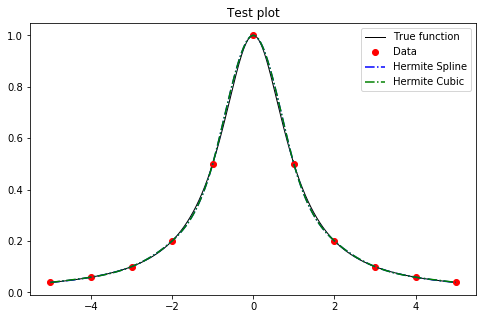

In [18]:
fig3, ax3 = plt.subplots(figsize=(8,5))

line1, = ax3.plot(x_grid, fx_grid, 'k-', linewidth=1, label='True function')
line2, = ax3.plot(x_data, fx_data, 'ro', linewidth=1, label='Data')
line3, = ax3.plot(x_grid, fx_int_hermite, 'b-.', label='Hermite Spline')
line4, = ax3.plot(x_grid, fx_int_hermite_cub, 'g-.', label='Hermite Cubic')
ax3.legend(loc='upper right')
ax3.set_title('Test plot')

plt.show() 